In [1]:
library(rstan)
library(bayesplot)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
This is bayesplot version 1.7.0
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting


In [2]:
file_beer_sales_2 <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-2-1-beer-sales-2.csv")

In [3]:
head(file_beer_sales_2)

sales,temperature
<dbl>,<dbl>
41.68,13.7
110.99,24.0
65.32,21.5
72.64,13.4
76.54,28.9
62.76,28.9


In [4]:
sample_size <- nrow(file_beer_sales_2)
sample_size

[1] 100

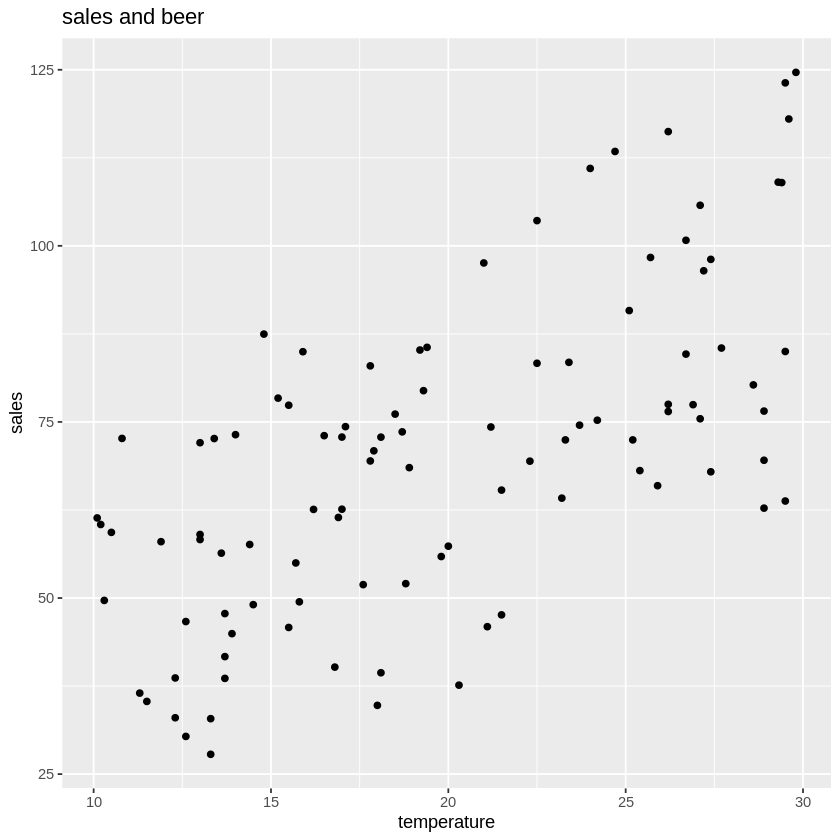

In [5]:
ggplot(file_beer_sales_2, aes(x = temperature, y = sales)) + geom_point() + labs(title = "sales and beer")

In [8]:
data_list <- list(
    N = sample_size,
    sales = file_beer_sales_2$sales,
    temperature = file_beer_sales_2$temperature
)

mcmc_result <- stan(
    file = "3-2-1-simple-lm.stan",
    data = data_list,
    seed = 1
)

print(mcmc_result, probs = c(0.025, 0.5, 0.975))

Inference for Stan model: 3-2-1-simple-lm.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean   sd    2.5%     50%   97.5% n_eff Rhat
Intercept   20.99    0.17 6.04    9.08   21.07   32.42  1340    1
beta         2.47    0.01 0.29    1.91    2.46    3.07  1349    1
sigma       17.10    0.03 1.24   14.90   17.01   19.85  2048    1
lp__      -330.15    0.03 1.22 -333.24 -329.83 -328.75  1392    1

Samples were drawn using NUTS(diag_e) at Wed Jul 24 15:41:34 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


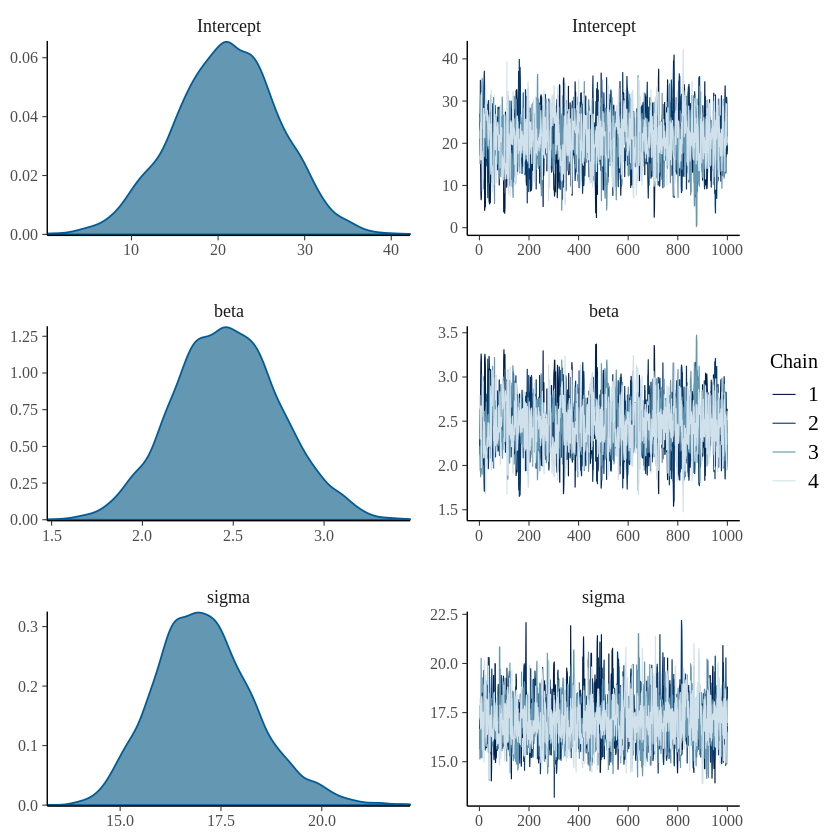

In [10]:
mcmc_sample <- rstan::extract(mcmc_result, permuted = FALSE)
mcmc_combo(
    mcmc_sample,
    pars = c("Intercept", "beta", "sigma")
)